In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('C:\\Users\\shkhd\\OneDrive\\Documents\\GitHub\\ML_LAB\\KNN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\shkhd\OneDrive\Documents\GitHub\ML_LAB\KNN\breast-cancer-wisconsin.data.txt
C:\Users\shkhd\OneDrive\Documents\GitHub\ML_LAB\KNN\knn.ipynb


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = 'C:\\Users\\shkhd\\OneDrive\\Documents\\GitHub\\ML_LAB\\KNN\\breast-cancer-wisconsin.data.txt'
df = pd.read_csv(data, header=None)

In [15]:
df.shape

(700, 11)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


In [17]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [18]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


In [19]:
df.drop('Id', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              700 non-null    object
 1   Uniformity_Cell_Size         700 non-null    object
 2   Uniformity_Cell_Shape        700 non-null    object
 3   Marginal_Adhesion            700 non-null    object
 4   Single_Epithelial_Cell_Size  700 non-null    object
 5   Bare_Nuclei                  700 non-null    object
 6   Bland_Chromatin              700 non-null    object
 7   Normal_Nucleoli              700 non-null    object
 8   Mitoses                      700 non-null    object
 9   Class                        700 non-null    object
dtypes: object(10)
memory usage: 54.8+ KB


In [21]:
for var in df.columns: 
    print(df[var].value_counts())

1                  145
5                  130
3                  108
4                   80
10                  69
2                   50
8                   46
6                   34
7                   23
9                   14
clump_thickness      1
Name: Clump_thickness, dtype: int64
1                 384
10                 67
3                  52
2                  45
4                  40
5                  30
8                  29
6                  27
7                  19
9                   6
unif_cell_size      1
Name: Uniformity_Cell_Size, dtype: int64
1                  353
2                   59
10                  58
3                   56
4                   44
5                   34
6                   30
7                   30
8                   28
9                    7
unif_cell_shape      1
Name: Uniformity_Cell_Shape, dtype: int64
1                407
3                 58
2                 58
10                55
4                 33
8                 25
5      

In [22]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [23]:
df.dtypes

Clump_thickness                 object
Uniformity_Cell_Size            object
Uniformity_Cell_Shape           object
Marginal_Adhesion               object
Single_Epithelial_Cell_Size     object
Bare_Nuclei                    float64
Bland_Chromatin                 object
Normal_Nucleoli                 object
Mitoses                         object
Class                           object
dtype: object

In [24]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    17
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [25]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    17
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [26]:
df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [34]:
df['Bare_Nuclei'].unique()

array([nan,  1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [35]:
df['Bare_Nuclei'].isna().sum()

17

In [52]:
df['Class'].value_counts()

2        458
4        241
class      1
Name: Class, dtype: int64

In [53]:
df['Class'].value_counts()/np.float64(len(df))

2        0.654286
4        0.344286
class    0.001429
Name: Class, dtype: float64

In [54]:
print(round(df.describe(),2))

       Bare_Nuclei
count       683.00
mean          3.54
std           3.64
min           1.00
25%           1.00
50%           1.00
75%           6.00
max          10.00


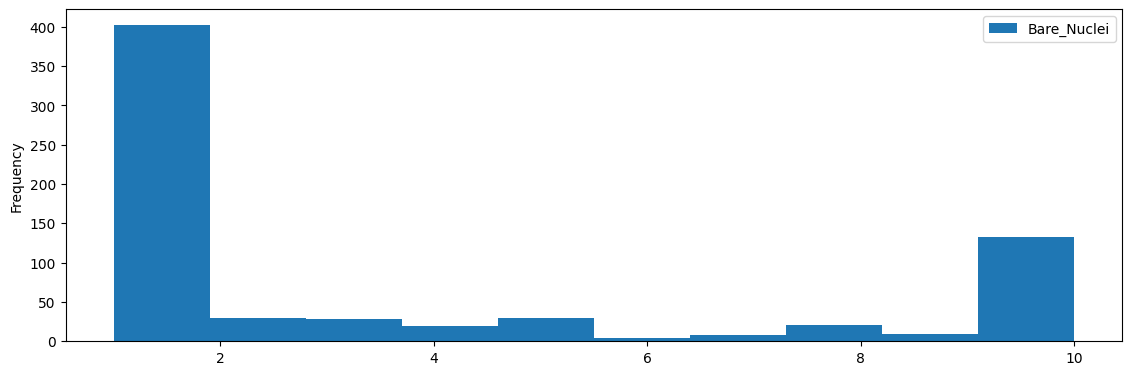

In [46]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()